In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from time import sleep

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [2]:
df_tr_fu_filt_delta = pd.read_csv('df_tr_fu_filt_delta.csv')
df_re_fu_filt_delta = pd.read_csv('df_re_fu_filt_delta.csv')

In [3]:
conteos_1d_tr = pd.read_csv('conteos_1d_tr.csv')
conteos_1d_re = pd.read_csv('conteos_1d_re.csv')

In [4]:
conteos_2d_tr = pd.read_csv('conteos_2d_tr.csv')
conteos_2d_re = pd.read_csv('conteos_2d_re.csv')

In [5]:
conteos_3d_tr = pd.read_csv('conteos_3d_tr.csv')
conteos_3d_re = pd.read_csv('conteos_3d_re.csv')

In [6]:
conteos_4d_tr = pd.read_csv('conteos_4d_tr.csv')
conteos_4d_re = pd.read_csv('conteos_4d_re.csv')

In [7]:
conteos_5d_tr = pd.read_csv('conteos_5d_tr.csv')
conteos_5d_re = pd.read_csv('conteos_5d_re.csv')

#### Establezco los valores de inicio de los sorteos para calcular deltas

In [8]:
df_topes = df_tr_fu_filt_delta.iloc[0::1,[0]]
recent = df_topes.max()
oldest = df_topes.min()

#### Se calcula los valores de diferencia entre los diversos sorteos

In [9]:
def calcular_deltas_verticales(df):
    delticas = []
    previo = recent
    for index, row in df.iterrows():
        resta = int(previo) - int(row[0])
        #print("resta : ", resta, " previo ", previo, " Sorteo: ", row[0], )
        delticas.append(resta)
        previo = int(row[0])
    resta = int(previo) - int(oldest)
    delticas.append(str(resta))
    return delticas

In [10]:
def unsplited_tupla(sbs):
    delticas = []
    partido = sbs.split(sep='|') if (sbs.find("|") >= 1) else sbs
    return partido

In [11]:
def calc_media(df):
    acum = 0
    media = 0
    length = len(df) 
    for i in range(length): 
        acum += int(df[i])
    media = acum/length
    return media

In [34]:
def calc_moda(df):
    repetir = 0                                                                         
    for i in df:                                                                              
        aparece = df.count(i)                                                             
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df:                                                                              
        aparece = df.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
            
    return moda

In [53]:
def calc_cant_moda(df_deltas, df_elected):
    print(df_elected)
    num = str(df_elected[0])
    partido = num.split(sep='|') if (num.find("|") >= 1) else num
    
    print(partido)
    repetir = 0                                                                         
    for i in df_deltas:
        print("valor de i :", i)
        aparece = df_deltas.count(df_elected[0])   
        print("valor de aparece:", aparece)
        if aparece > repetir:                                                       
            repetir = aparece 
    
    moda = []                                                                               
    for i in df_deltas:                                                                              
        aparece = df_deltas.count(i)
        #print("aparece ", aparece)
        if aparece == repetir and i not in moda:                                   
            moda.append(i) 
            #print("moda", moda)
    print("fin ciclo", moda)        
    return moda

In [54]:
def procesa_conteo_singles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    for x in range (1,44):
        sbs = [str(x)]
        dftx = df[df.n1.isin(sbs) | df.n2.isin(sbs) |df.n3.isin(sbs) | df.n4.isin(sbs) |df.n5.isin(sbs)]
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        conteos = calc_cant_moda(df_tupla, df_moda)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)        
        #print(sbs, " X", promedio, " L", last, " M", moda," T",  df_tupla)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['M'] = modaa
    dft['T'] = delta
    return dft

In [55]:
df_cs_tr = procesa_conteo_singles(conteos_1d_tr, df_tr_fu_filt_delta)

[1]
1
valor de i : 2
8
valor de i : 3
8
valor de i : 3
8
valor de i : 3
8
valor de i : 1
8
valor de i : 13
8
valor de i : 12
8
valor de i : 4
8
valor de i : 5
8
valor de i : 14
8
valor de i : 5
8
valor de i : 5
8
valor de i : 3
8
valor de i : 3
8
valor de i : 30
8
valor de i : 4
8
valor de i : 20
8
valor de i : 1
8
valor de i : 8
8
valor de i : 1
8
valor de i : 1
8
valor de i : 6
8
valor de i : 2
8
valor de i : 1
8
valor de i : 21
8
valor de i : 2
8
valor de i : 18
8
valor de i : 4
8
valor de i : 8
8
valor de i : 20
8
valor de i : 19
8
valor de i : 1
8
valor de i : 15
8
valor de i : 20
8
valor de i : 7
8
valor de i : 1
8
valor de i : 1
8
valor de i : 15
8
valor de i : 13
8
valor de i : 5
8
valor de i : 2
8
valor de i : 2
8
valor de i : 2
8
valor de i : 5
8
valor de i : 2
8
valor de i : 5
8
valor de i : 14
8
valor de i : 4
8
valor de i : 3
8
valor de i : 1
8
fin ciclo [1]
[3]
3
valor de i : 2
7
valor de i : 4
7
valor de i : 2
7
valor de i : 7
7
valor de i : 3
7
valor de i : 5
7
valor de

TypeError: list indices must be integers or slices, not str

In [14]:
def procesa_conteo_dobles(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2))]
        if ((sbs1 == 1) & (sbs2 == 4)):
            print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['M'] = modaa
    dft['T'] = delta
    return dft

In [15]:
def procesa_conteo_triples(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['M'] = modaa
    dft['T'] = delta
    return dft

In [16]:
def procesa_conteo_cuartetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['M'] = modaa
    dft['T'] = delta
    return dft

In [17]:
def procesa_conteo_quintetos(conteos, df):
    media = []
    modaa = []
    lasts = []
    delta = []    
    for index, row in conteos.iterrows():
        sbs = str(row[1])
        splitedtupla= unsplited_tupla(sbs)
        sbs1 = [str(splitedtupla[0])]
        sbs2 = [str(splitedtupla[1])]
        sbs3 = [str(splitedtupla[2])]
        sbs4 = [str(splitedtupla[3])]
        sbs5 = [str(splitedtupla[4])]
        dftx = df[(df.n1.isin(sbs1) | df.n2.isin(sbs1) |df.n3.isin(sbs1) | df.n4.isin(sbs1) |df.n5.isin(sbs1)) 
                & (df.n1.isin(sbs2) | df.n2.isin(sbs2) |df.n3.isin(sbs2) | df.n4.isin(sbs2) |df.n5.isin(sbs2)) 
                & (df.n1.isin(sbs3) | df.n2.isin(sbs3) |df.n3.isin(sbs3) | df.n4.isin(sbs3) |df.n5.isin(sbs3))
                & (df.n1.isin(sbs4) | df.n2.isin(sbs4) |df.n3.isin(sbs4) | df.n4.isin(sbs4) |df.n5.isin(sbs4))
                & (df.n1.isin(sbs5) | df.n2.isin(sbs5) |df.n3.isin(sbs5) | df.n4.isin(sbs5) |df.n5.isin(sbs5)) ]
        #print(dftx)
        df_filt = dftx.iloc[0::1,[0]]
        df_tupla = calcular_deltas_verticales(df_filt)
        lasts.append(df_tupla[0])
        media.append(calc_media(df_tupla))
        df_moda = calc_moda(df_tupla)
        pal = '|'.join([str(m) for m in df_moda]) if len(df_moda) > 1  else str(df_moda[0])
        modaa.append(pal)
        palabra = '|'.join([str(e) for e in df_tupla]) 
        delta.append(palabra)
    dft = conteos
    dft['X'] = media
    dft['L'] = lasts
    dft['M'] = modaa
    dft['T'] = delta
    return dft

In [19]:
df_cd_tr = procesa_conteo_dobles(conteos_2d_tr, df_tr_fu_filt_delta)

In [20]:
df_ct_tr = procesa_conteo_triples(conteos_3d_tr, df_tr_fu_filt_delta)

In [21]:
df_cc_tr = procesa_conteo_cuartetos(conteos_4d_tr, df_tr_fu_filt_delta)

In [22]:
df_cq_tr = procesa_conteo_quintetos(conteos_5d_tr, df_tr_fu_filt_delta)

#### Aqui empiezan los llamados a los calculos de revancha

In [23]:
df_cs_re = procesa_conteo_singles(conteos_1d_re, df_re_fu_filt_delta)

In [24]:
df_cd_re = procesa_conteo_dobles(conteos_2d_re, df_re_fu_filt_delta)

In [25]:
df_ct_re = procesa_conteo_triples(conteos_3d_re, df_re_fu_filt_delta)

In [26]:
df_cc_re = procesa_conteo_cuartetos(conteos_4d_re, df_re_fu_filt_delta)

In [27]:
df_cq_re = procesa_conteo_quintetos(conteos_5d_re, df_re_fu_filt_delta)

#### Aqui inicia el guardado de los dataframe del sorteo tradicional

In [28]:
df_cs_tr.to_csv(r'df_cs_tr.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cd_tr.to_csv(r'df_cd_tr.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_ct_tr.to_csv(r'df_ct_tr.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cc_tr.to_csv(r'df_cc_tr.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cq_tr.to_csv(r'df_cq_tr.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')

#### Aqui inicia el guardado de los dataframe del sorteo revancha

In [29]:
df_cs_re.to_csv(r'df_cs_re.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cd_re.to_csv(r'df_cd_re.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_ct_re.to_csv(r'df_ct_re.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cc_re.to_csv(r'df_cc_re.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')
df_cq_re.to_csv(r'df_cq_re.csv', header=['conteo','tupla','X', 'L', 'M', 'T'], index=None, sep=',', mode='w')

#### El codigo validado ha concluido aquí, lo siguiente  son pruebas de concepto

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x_s = np.array([1,2,3,1,2,2,3,4,1,2,3,4,1,2,4])
n = len(x_s)

#forma lenta
x_mean = 0
for x in x_s:
    x_mean +=x
x_mean/=n
print(x_mean)

2.3333333333333335


In [32]:
df_topes2 = conteos_2d_tr.iloc[0::1,[0,1]]
print(df_topes2)
mu = 2.0
sigma_1 = 5.0
sigma_2 = 5.0
muestras_1 = np.random.normal(loc = mu, scale = sigma_1, size = 100)
muestras_2 = np.random.normal(loc = mu, scale = sigma_2, size = 100)
print(type(muestras_1))
#print(muestras_1, muestras_2)

     conteo  tupla
0         8    1|2
1         4    1|3
2         9    1|4
3         6    1|5
4         3    1|6
..      ...    ...
887       5  40|42
888       1  40|43
889       3  41|42
890       3  41|43
891       3  42|43

[892 rows x 2 columns]
<class 'numpy.ndarray'>


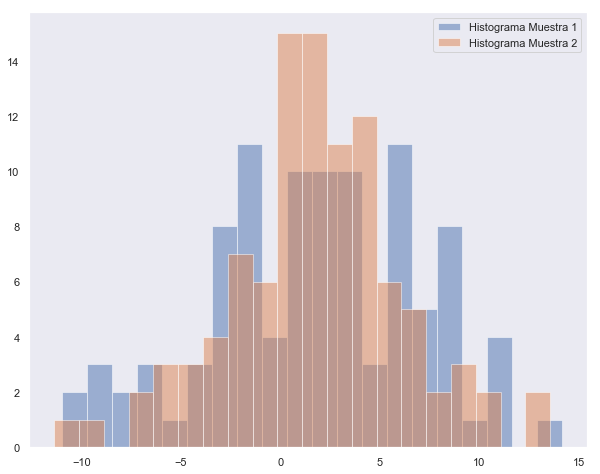

In [33]:
plt.figure(figsize = (10,8))
plt.hist(muestras_1, bins = 20, alpha = 0.5, label = 'Histograma Muestra 1')
plt.hist(muestras_2, bins = 20, alpha = 0.5, label = 'Histograma Muestra 2')
plt.legend()
plt.grid()
plt.show()